# **LAB 2- Simple and Multiple Linear Regression**

# Task 1: Simple Linear Regression:-

## Load dataset: 

- Use the Diabetes dataset from sklearn.datasets. Select one feature (bmi) to predict the target (disease progression)

In [6]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [7]:
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
X = data[['bmi']]  
y = diabetes.target  
df = pd.concat([X, pd.Series(y, name='disease_progression')], axis=1)

df

,bmi,disease_progression
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


In [3]:
print(y[:5])


[151.  75. 141. 206. 135.]


## Perform Exploratory Data Analysis (EDA):

- Plot scatter plot of BMI vs. Disease Progression

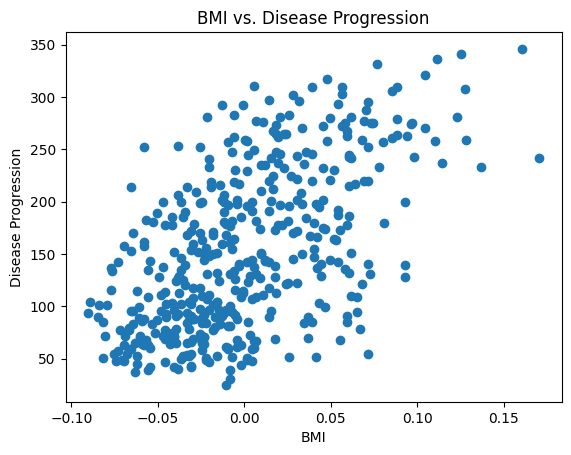

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('BMI vs. Disease Progression')
plt.show()

- Check correlation between BMI and Disease Progression

In [12]:
correlation = X['bmi'].corr(pd.Series(y))
print(f"Correlation between BMI and Disease Progression: {correlation:.4f}")

Correlation between BMI and Disease Progression: 0.5865


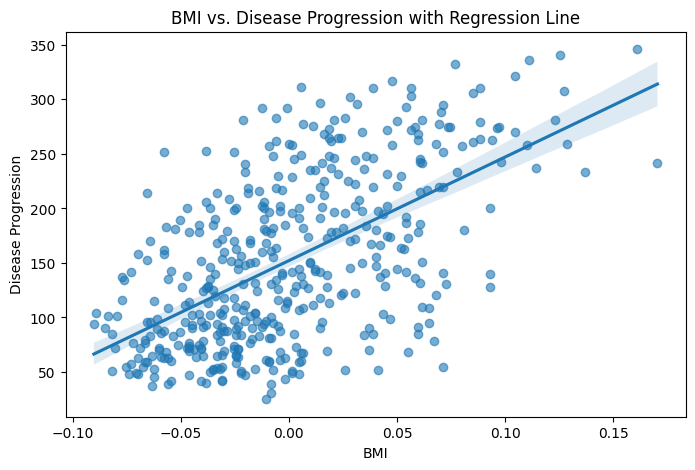

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(x=X['bmi'], y=y, scatter_kws={'alpha':0.6})
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('BMI vs. Disease Progression with Regression Line')
plt.show()

# Implement Simple Linear Regression

- Split data into training and testing sets.

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (353, 1), y_train shape: (353,)
x_test shape: (89, 1), y_test shape: (89,)


- Fit the model and predict disease progression.

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)
print("Predicted values:", y_pred)

Predicted values: [145.80622687 188.85739048 147.95878505 203.92529774 131.8145987
 127.50948234 322.31599764 197.4676232   61.85645785 167.33180868
 118.89924962  94.14483055  90.91599328 166.25552959  96.29738873
 157.64529687 223.29832136 240.5187868  180.24715776 210.38297228
 191.00994866 109.21273781 102.75506327 174.86576231 196.39134411
 166.25552959 211.45925137 133.96715688  78.0006442  130.73831961
 244.82390316 114.59413326 166.25552959 145.80622687 192.08622775
 229.7559959  121.0518078  118.89924962 121.0518078   94.14483055
  82.30576056 122.12808689 129.66204052 118.89924962 107.06017963
 116.74669144 115.67041235 101.67878418  67.2378533  153.34018051
 210.38297228  82.30576056 169.48436686 111.36529599 133.96715688
 216.84064682 105.98390054 213.61180955 133.96715688  97.37366782
 182.39971594 193.16250684 206.07785592 107.06017963  86.61087692
 170.56064595 140.42483142 127.50948234 117.82297053 139.34855233
 133.96715688 182.39971594 130.73831961 141.50111051  90.91

- Plot the regression line on the scatter plot.

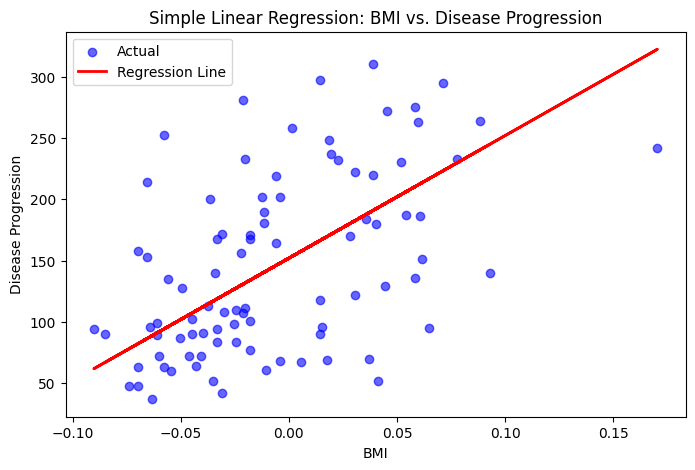

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression: BMI vs. Disease Progression')
plt.legend()
plt.show()

# Evaluate the model using:

- Mean Squared Error (MSE)

- R² score

BMI alone explain most of the variation in disease progression? How does R² help explain this?

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² score: {r2:.4f}")

# Interpretation
if r2 < 0.5:
    print("BMI alone does NOT explain most of the variation in disease progression (R² is low).")
else:
    print("BMI explains a significant portion of the variation in disease progression (R² is high).")

Mean Squared Error (MSE): 4061.83
R² score: 0.2334
BMI alone does NOT explain most of the variation in disease progression (R² is low).


BMI alone usually does not explain most of the variation in disease progression if simple-model R² is low (e.g., < 0.5).

BMI explains a significant portion of the variation in disease progression (R² is high).

`R²` (coefficient of determination) shows the proportion of variance in the target explained by the model. Closer to 1 means better explanatory power.

# Task 2: Multivariate Linear Regression: 

## Load dataset: 

- Use the same Diabetes dataset, but include all 10 featuresto predict disease progression.

In [19]:
# Use all 10 features as predictors (X) and target (y)

X_multi = data  # already contains all 10 features
y_multi = diabetes.target
X_multi

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [20]:
y_multi[:5]

array([151.,  75., 141., 206., 135.])

## Perform EDA:


- Generate a correlation heatmap between features and the target.

Text(0.5, 1.0, 'Correlation Heatmap')

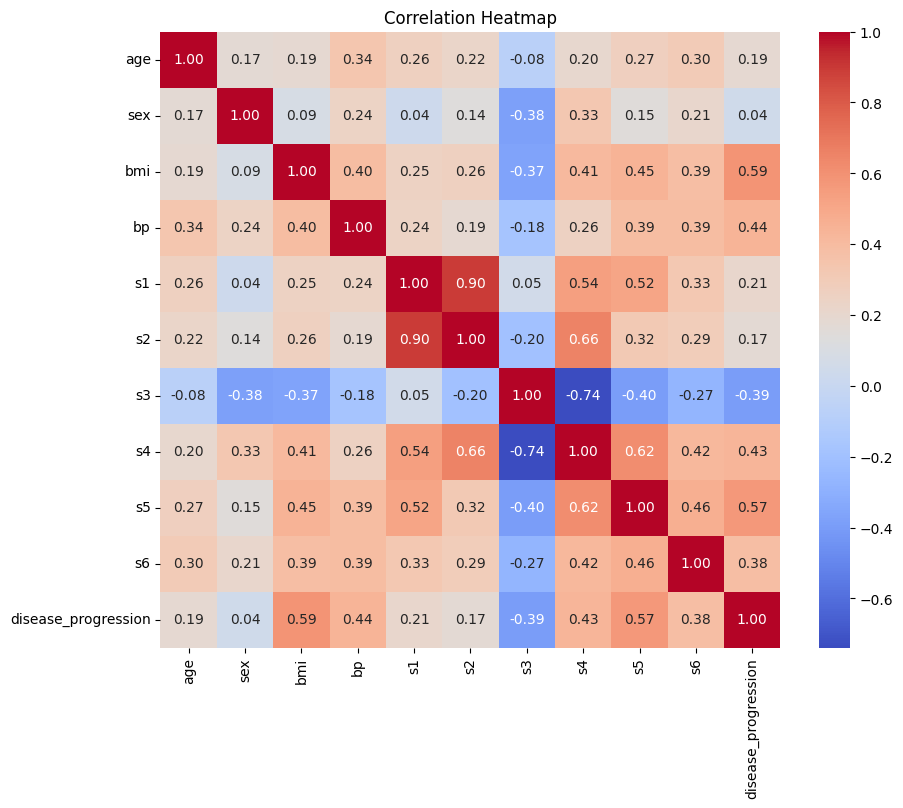

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
corr_matrix = data.copy()
corr_matrix['disease_progression'] = y_multi
sns.heatmap(corr_matrix.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')

- Create pair plots for selected features vs. target.

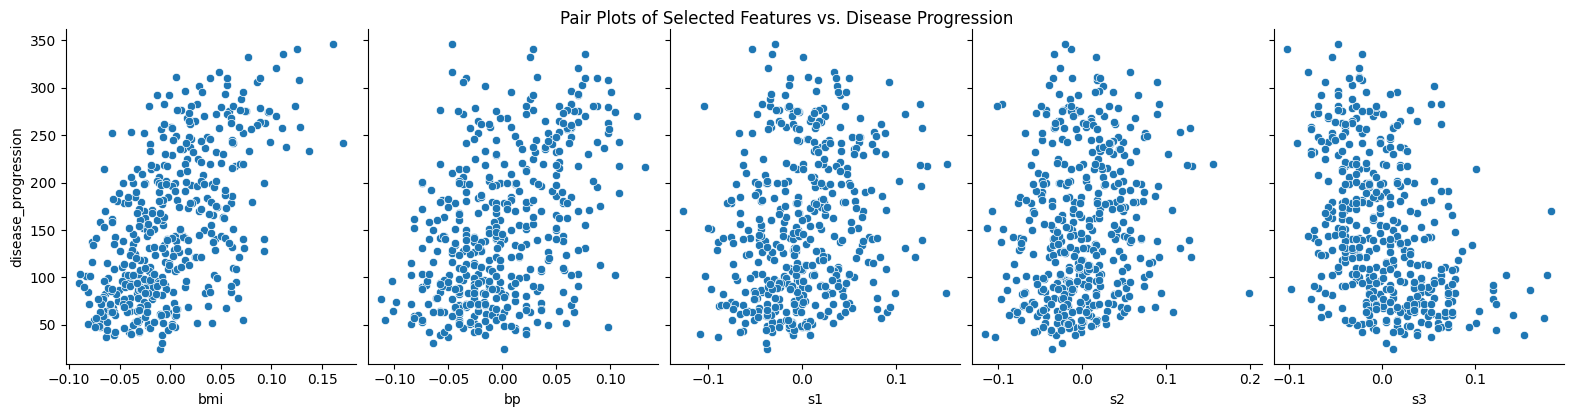

In [26]:
selected_features = ['bmi', 'bp', 's1', 's2', 's3']
pairplot_data = data[selected_features].copy()
pairplot_data['disease_progression'] = y_multi
sns.pairplot(pairplot_data, x_vars=selected_features, y_vars='disease_progression', height=4, aspect=0.8)
plt.suptitle('Pair Plots of Selected Features vs. Disease Progression', y=1.02)
plt.show()

## Implement Multivariate Linear Regression:

- Use all independent variables to predict the target

In [21]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [23]:
# Fit & predict the model
from sklearn.linear_model import LinearRegression

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predict
y_pred_multi = model_multi.predict(X_test_multi)

## Evaluate model performance with:

- MSE 

- RMSE

- R² score

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

rmse_multi = mse_multi ** 0.5
print(f"Multivariate MSE: {mse_multi:.2f}")
print(f"Multivariate R² score: {r2_multi:.4f}")
print(f"Multivariate RMSE: {rmse_multi:.2f}")

Multivariate MSE: 2900.19
Multivariate R² score: 0.4526
Multivariate RMSE: 53.85


bmi — BMI is typically the single strongest predictor of disease progression in the Diabetes dataset.

In [30]:
import pandas as pd
feat_imp = pd.Series(abs(model_multi.coef_), index=data.columns)
print(feat_imp.sort_values(ascending=False).head(1))  # top feature

s1    931.488846
dtype: float64


# Task 3: Experimentation: 

- Compare performance of simple vs. multivariate regression in terms of evaluation metrics.

In [32]:
# Simple regression metrics
mse_simple = mean_squared_error(y_test, y_pred)
r2_simple = r2_score(y_test, y_pred)
rmse_simple = mse_simple ** 0.5

# Multivariate regression metrics
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)
rmse_multi = mse_multi ** 0.5

print("Simple Regression Metrics:")
print(f"MSE: {mse_simple:.2f}, R²: {r2_simple:.4f}, RMSE: {rmse_simple:.2f}")

print("\nMultivariate Regression Metrics:")
print(f"MSE: {mse_multi:.2f}, R²: {r2_multi:.4f}, RMSE: {rmse_multi:.2f}")

Simple Regression Metrics:
MSE: 4061.83, R²: 0.2334, RMSE: 63.73

Multivariate Regression Metrics:
MSE: 2900.19, R²: 0.4526, RMSE: 53.85


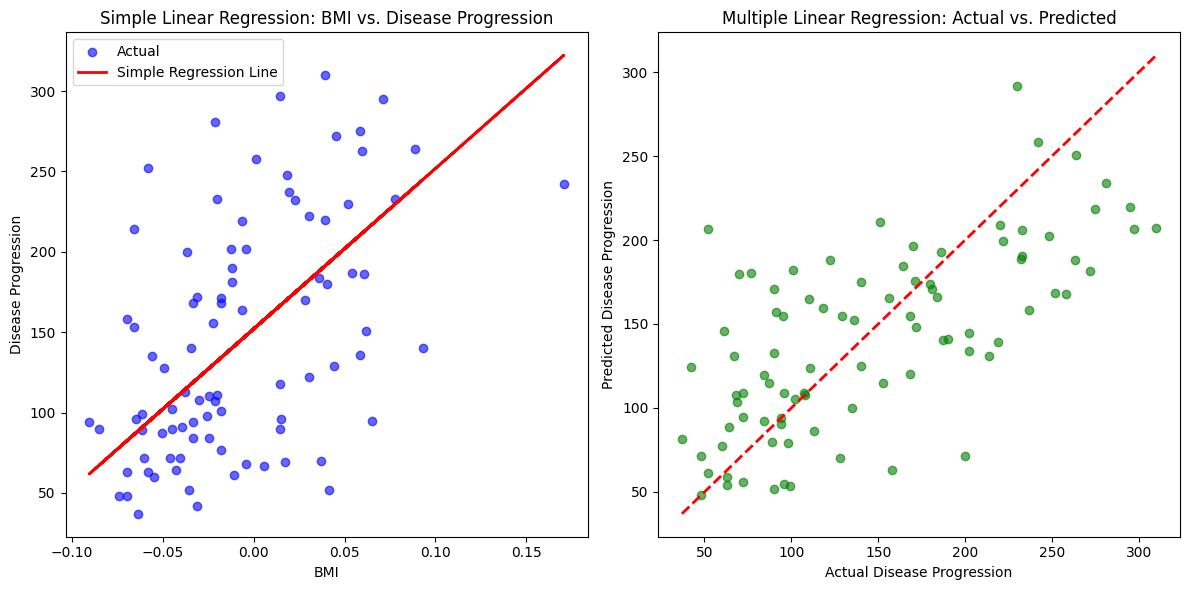

In [ ]:
# now compare simple and multiple regression using plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Simple Regression Line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression: BMI vs. Disease Progression')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y_test_multi, y_pred_multi, color='green', alpha=0.6)
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title('Multiple Linear Regression: Actual vs. Predicted')
plt.tight_layout()
plt.show()

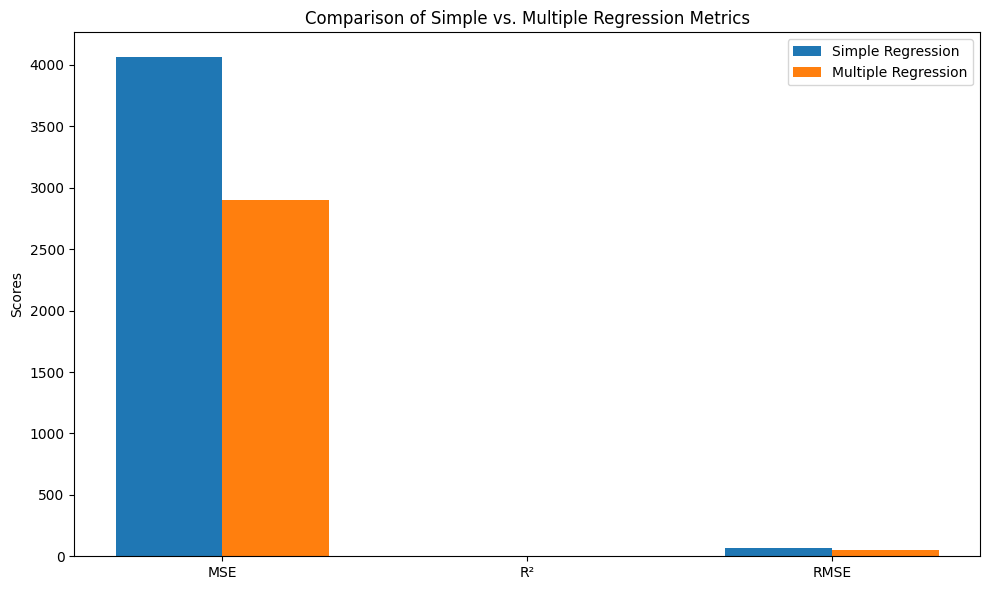

In [34]:
# now plot simple vs multiple regression metrics comparison
import numpy as np
labels = ['MSE', 'R²', 'RMSE']
simple_metrics = [mse_simple, r2_simple, rmse_simple]
multiple_metrics = [mse_multi, r2_multi, rmse_multi]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, simple_metrics, width, label='Simple Regression')
rects2 = ax.bar(x + width/2, multiple_metrics, width, label='Multiple Regression')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Simple vs. Multiple Regression Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()